In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab\ Notebooks/Others/AMS/

/content/drive/MyDrive/Colab Notebooks/Others/AMS


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import time, os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils

import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras import backend as K

from sklearn import decomposition

from keras.applications import MobileNetV2
import matplotlib.pyplot as plt


# ======================================================================================================================
def make_model_MLP1(num_feature, nb_classes):
    model = Sequential()
    model.add(Flatten(input_shape=(num_feature,)))
    model.add(Dense(1, activation='tanh'))
    #model.add(Activation('softmax'))
    # print model structure
    model.summary()
    return model
def make_model_MLP2(num_feature, nb_classes):
    model = Sequential()
    model.add(Flatten(input_shape=(num_feature,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='tanh'))
    # print model structure
    model.summary()
    return model
def make_model_CNN1(input_shape, nb_classes):
    model_2 = Sequential()
    model_2.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model_2.add(MaxPooling2D(pool_size=(2,2)))
    model_2.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2,2)))
    model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    model_2.add(MaxPooling2D(pool_size=(2,2)))
    #model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    #model_2.add(MaxPooling2D(pool_size=(2,2)))
    model_2.add(Dropout(0.25))
    model_2.add(Flatten())
    #model_2.add(Dense(128, activation='relu'))
    #model_2.add(Dropout(0.5))
    model_2.add(Dense(nb_classes,activation='softmax'))
    model_2.summary()
    return model_2
def make_model_CNN2(input_shape, nb_classes):
    ###################
    # Model
    #####################
    base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=input_shape)
    #x = keras.layers.GlobalAveragePooling2D(base_model.input)
    flatten = keras.layers.Flatten()
    x = flatten(base_model.output)
    #class1 = Dense(100, activation='relu', name='dense_feature')(model_base.output)
    output = Dense(nb_classes, activation='softmax')(x)
    model = Model(inputs=base_model.inputs, outputs=output)
    # freeze some layers
    #for layer in base_model.layers:
    #    layer.trainable = False
    model.summary()
    return model
class A1():
    def __init__(self, model, task, image_shape):
        super(A1, self).__init__()
        self.task = task
        self.num_feature =image_shape[0]*image_shape[1]*3
        self.input_shape = (image_shape[0],image_shape[1],3)
        print(self.input_shape)
        if self.task == 0:
            self.nb_classes = 2
        elif self.task == 1:
            self.nb_classes = 2
        elif self.task == 2:
            self.nb_classes = 5
        elif self.task == 3:
            self.nb_classes = 5
        self.model_name = model
        
        if self.model_name=='MLP1':
            self.model = make_model_MLP1(self.num_feature, self.nb_classes)
        elif self.model_name == 'MLP2':
            self.model = make_model_MLP2(self.num_feature, self.nb_classes)
        elif self.model_name == 'CNN1':
            self.model = make_model_CNN1(self.input_shape, self.nb_classes)
        elif self.model_name == 'CNN2':
            self.model = make_model_CNN2(self.input_shape, self.nb_classes)
        
    def train(self, train_generator, val_generator, lr, epochs, STEP_SIZE_TRAIN, STEP_SIZE_VALID):
        if self.model_name == 'MLP1':
            print("======================logic regression training starts:======================\n")
            t1 = time.time()
            self.model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(lr=lr),metrics = ['accuracy'])
            self.history = self.model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)
            t2 = time.time()
            self.plotting('MLP1')
            score_train = self.model.evaluate_generator(generator=train_generator,steps=STEP_SIZE_TRAIN)
            score_val = self.model.evaluate_generator(generator=val_generator,steps=STEP_SIZE_VALID)
            print('MLP1 finished with time costing:', t2-t1)
            print('MLP1 Trained Accuracy: ', score_train[1])
            print('MLP1 Validation Accuracy: ', score_val[1])
            
            acc_train =score_train[1]
        elif self.model_name == 'MLP2':
            print("======================MLP2 training starts:======================\n")
            t1 = time.time()
            self.model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer=Adam(lr=lr),metrics = ['accuracy'])
            self.history = self.model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)
            t2 = time.time()
            self.plotting('MLP2')
            score_train = self.model.evaluate_generator(generator=train_generator,steps=STEP_SIZE_TRAIN)
            score_val = self.model.evaluate_generator(generator=val_generator,steps=STEP_SIZE_VALID)
            print('MLP2 finished with time costing:', t2-t1)
            print('MLP2 Trained Accuracy: ', score_train[1])
            print('MLP2 Validation Accuracy: ', score_val[1])
            
            acc_train =score_train[1]
        elif self.model_name == 'CNN1':
            print("======================CNN1 training starts:======================\n")
            t1 = time.time()
            self.model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),optimizer=Adam(lr=lr),metrics=['accuracy'])
            print('optimizer compile done')
            self.history = self.model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)
            t2 = time.time()
            self.plotting('CNN1')
            score_train = self.model.evaluate_generator(train_generator,steps=STEP_SIZE_TRAIN)
            score_val = self.model.evaluate_generator(val_generator,steps=STEP_SIZE_VALID)
            print('Train accuracy:',score_train[1])
            print('Val accuracy:',score_val[1])
            acc_train =score_train[1]
        elif self.model_name == 'CNN2':
            print("======================CNN2 training starts:======================\n")
            t1 = time.time()
            self.model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True),optimizer=Adam(lr=lr),metrics=['accuracy'])
            self.history = self.model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=epochs)
            t2 = time.time()
            self.plotting('CNN2')
            score_train = self.model.evaluate_generator(train_generator,steps=STEP_SIZE_TRAIN)
            score_val = self.model.evaluate_generator(val_generator,steps=STEP_SIZE_VALID)
            print('Train accuracy:',score_train[1])
            print('Val accuracy:',score_val[1])
            acc_train =score_train[1]
            
        return acc_train
    def test(self, test_generator, STEP_SIZE_TEST):
        if self.model_name == 'MLP1':
            score_test = self.model.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
            print('MLP1 Tested Accuracy: ', score_test[1])
            test_acc = score_test[1]
        
        elif self.model_name == 'MLP2':
            score_test = self.model.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
            print('MLP2 Tested Accuracy: ', score_test[1])
            test_acc = score_test[1]
        elif self.model_name == 'CNN1':
            score_test = self.model.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
            print('Test accuracy:',score_test[1])
            test_acc = score_test[1]
        elif self.model_name == 'CNN2':
            score_test = self.model.evaluate_generator(generator=test_generator,steps=STEP_SIZE_TEST)
            print('Test accuracy:',score_test[1])
            test_acc = score_test[1]
        return test_acc
    def plotting(self, name):
        
        plt.figure()

        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('epoch')
        plt.legend(['Train', 'validation'], loc='upper left')
        plt.savefig(name+'_acc_'+str(self.task)+'_'+self.model_name)
        #plt.show()

        plt.figure()

        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'validation'], loc='upper left')
        plt.savefig(name+'_loss_'+str(self.task)+'_'+self.model_name)
        #plt.show()


start task 3
(32, 32, 3)
Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
_____________________________________________________________

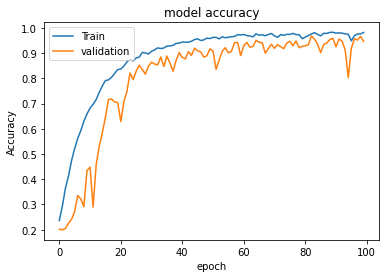

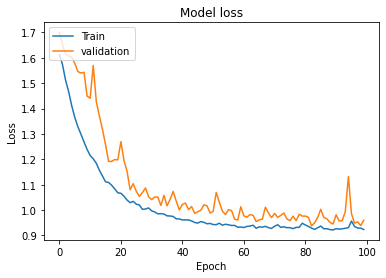

In [19]:
#from A1.A1 import A1
#from A2.A2 import A2
#from B1.B1 import B1
#from B2.B2 import B2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

import argparse
import os
"""
args
"""
model='CNN2'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=3
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)

# ======================================================================================================================
# Data preprocessing
# define image loading


# define the data_preprossing
def data_preprocessing(task):
    if task == 0:#A1
        traindf=pd.read_csv('./Datasets/celeba/labels.csv',dtype=str)
        datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
        train_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/celeba/img/",
          x_col="img_name",
          y_col="gender",
          subset="training",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="binary",
          target_size=image_shape_1)
        val_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/celeba/img/",
          x_col="img_name",
          y_col="gender",
          subset="validation",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="binary",
          target_size=image_shape_1)
        testdf=pd.read_csv('./Datasets/celeba_test/labels.csv',dtype=str)
        test_datagen=ImageDataGenerator(rescale=1./255.)
        test_generator=test_datagen.flow_from_dataframe(
          dataframe=testdf,
          directory="./Datasets/celeba_test/img/",
          x_col="img_name",
          y_col="gender",
          batch_size=batch_size_test,
          seed=42,
          shuffle=False,
          class_mode="binary",
          target_size=image_shape_1)
    elif task == 1:#A2
        traindf=pd.read_csv('./Datasets/celeba/labels.csv',dtype=str)
        datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
        train_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/celeba/img/",
          x_col="img_name",
          y_col="smiling",
          subset="training",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="binary",
          target_size=image_shape_1)
        val_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/celeba/img/",
          x_col="img_name",
          y_col="smiling",
          subset="validation",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="binary",
          target_size=image_shape_1)
        testdf=pd.read_csv('./Datasets/celeba_test/labels.csv',dtype=str)
        test_datagen=ImageDataGenerator(rescale=1./255.)
        test_generator=test_datagen.flow_from_dataframe(
          dataframe=testdf,
          directory="./Datasets/celeba_test/img/",
          x_col="img_name",
          y_col="smiling",
          batch_size=batch_size_test,
          seed=42,
          shuffle=False,
          class_mode="binary",
          target_size=image_shape_1)
    elif task == 2:#B2
        traindf=pd.read_csv('./Datasets/cartoon_set/labels.csv',dtype=str)
        datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
        train_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/cartoon_set/img/",
          x_col="file_name",
          y_col="eye_color",
          subset="training",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="categorical",
          target_size=image_shape_2)
        val_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/cartoon_set/img/",
          x_col="file_name",
          y_col="eye_color",
          subset="validation",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="categorical",
          target_size=image_shape_2)
        testdf=pd.read_csv('./Datasets/cartoon_set_test/labels.csv',dtype=str)
        test_datagen=ImageDataGenerator(rescale=1./255.)
        test_generator=test_datagen.flow_from_dataframe(
          dataframe=testdf,
          directory="./Datasets/cartoon_set_test/img/",
          x_col="file_name",
          y_col="eye_color",
          batch_size=batch_size_test,
          seed=42,
          shuffle=False,
          class_mode="categorical",
          target_size=image_shape_2)
    elif task == 3:#B1
        traindf=pd.read_csv('./Datasets/cartoon_set/labels.csv',dtype=str)
        datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.2)
        train_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/cartoon_set/img/",
          x_col="file_name",
          y_col="face_shape",
          subset="training",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="categorical",
          target_size=image_shape_2)
        val_generator=datagen.flow_from_dataframe(
          dataframe=traindf,
          directory="./Datasets/cartoon_set/img/",
          x_col="file_name",
          y_col="face_shape",
          subset="validation",
          batch_size=batch_size,
          seed=42,
          shuffle=True,
          class_mode="categorical",
          target_size=image_shape_2)
        testdf=pd.read_csv('./Datasets/cartoon_set_test/labels.csv',dtype=str)
        test_datagen=ImageDataGenerator(rescale=1./255.)
        test_generator=test_datagen.flow_from_dataframe(
          dataframe=testdf,
          directory="./Datasets/cartoon_set_test/img/",
          x_col="file_name",
          y_col="face_shape",
          batch_size=batch_size_test,
          seed=42,
          shuffle=False,
          class_mode="categorical",
          target_size=image_shape_2)
    return train_generator, val_generator, test_generator


#"""
# ======================================================================================================================

# Task A1
if task==0:
    print('start task 0')
    #task = 0
    model_A1 = A1(model,task,image_shape_1)                 # Build model object.
    train_generator, val_generator, test_generator = data_preprocessing(task=task)
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    acc_A1_train = model_A1.train(train_generator, val_generator, lr, epochs, STEP_SIZE_TRAIN, STEP_SIZE_VALID) # Train model based on the training set (you should fine-tune your model based on validation set.)
    acc_A1_test = model_A1.test(test_generator, STEP_SIZE_TEST)   # Test model based on the test set.
    #Clean up memory/GPU etc...             # Some code to free memory if necessary.

    ##########
    # Logic Regression: 50 epoch

    # MLP: (99.57/ 89.89/ ) 50 epoch
    ##########
#"""

#"""
# ======================================================================================================================
# Task A2
if task==1:
    print('start task 1')
    #task = 1
    model_A2 = A1(model,task,image_shape_1)                 # Build model object.
    train_generator, val_generator, test_generator = data_preprocessing(task=task)
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    acc_A2_train = model_A2.train(train_generator, val_generator, lr, epochs, STEP_SIZE_TRAIN, STEP_SIZE_VALID) # Train model based on the training set (you should fine-tune your model based on validation set.)
    acc_A2_test = model_A2.test(test_generator, STEP_SIZE_TEST)   # Test model based on the test set.
    #Clean up memory/GPU etc...             # Some code to free memory if necessary.

    ##########
    # Logic Regression: (94.12/ 86.40 / ) 50 epoch

    # MLP: (99.12/ 85.29/ ) 50 epoch

    ##########
    #"""

#"""
# ======================================================================================================================
# Task B2
if task==2:
    print('start task 2')
    #task = 2
    model_A3 = A1(model,task,image_shape_2)                 # Build model object.
    train_generator, val_generator, test_generator = data_preprocessing(task=task)
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    acc_A3_train = model_A3.train(train_generator, val_generator, lr, epochs, STEP_SIZE_TRAIN, STEP_SIZE_VALID) # Train model based on the training set (you should fine-tune your model based on validation set.)
    acc_A3_test = model_A3.test(test_generator, STEP_SIZE_TEST)   # Test model based on the test set.

    ##########
    # CNN1:
    # CNN2:
    ##########


# ======================================================================================================================
# Task B1
if task==3:
    print('start task 3')
    #task = 3
    model_A4 = A1(model,task,image_shape_2)                 # Build model object.
    train_generator, val_generator, test_generator = data_preprocessing(task=task)
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    acc_A4_train = model_A4.train(train_generator, val_generator, lr, epochs, STEP_SIZE_TRAIN, STEP_SIZE_VALID) # Train model based on the training set (you should fine-tune your model based on validation set.)
    acc_A4_test = model_A4.test(test_generator, STEP_SIZE_TEST)   # Test model based on the test set.
    #Clean up memory/GPU etc...             # Some code to free memory if necessary.

    ##########
    # CNN1:
    # CNN2:
    ##########
#"""

# ======================================================================================================================
## Print out your results with following format:
#print('TA1:{},{};TA2:{},{};TB1:{},{};TB2:{},{};'.format(acc_A1_train, acc_A1_test,
#                                                        acc_A2_train, acc_A2_test,
#                                                        acc_B1_train, acc_B1_test,
#                                                        acc_B2_train, acc_B2_test))



In [ ]:
# task 0
"""
model='MLP1'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=0
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
MLP1 finished with time costing: 2964.6233100891113
MLP1 Trained Accuracy:  0.8512499928474426
MLP1 Validation Accuracy:  0.850806474685669
MLP1 Tested Accuracy:  0.8524112
"""

"""
model='MLP2'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=0
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
MLP2 finished with time costing: 795.5357623100281
MLP2 Trained Accuracy:  0.9832500219345093
MLP2 Validation Accuracy:  0.8891128897666931
MLP2 Tested Accuracy:  0.8984375
"""

In [ ]:
#task 1
"""
task=1
model='MLP1'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256

image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
Logic Regression finished with time costing: 740.6211295127869
Logic Regression Trained Accuracy:  0.8805000185966492
Logic Regression Validation Accuracy:  0.8215726017951965
MLP1 Tested Accuracy:  0.8463541865348816
"""

"""
task=1
model='MLP2'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
#MLP1 finished with time costing: 777.0550985336304
#MLP1 Trained Accuracy:  0.9890000224113464
#MLP1 Validation Accuracy:  0.8417338728904724
#MLP1 Tested Accuracy:  0.8567708134651184
"""


In [ ]:
#task 2
"""
model='CNN1'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=2
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
Train accuracy: 0.8698750138282776
Val accuracy: 0.8266128897666931
Test accuracy: 0.8276909589767456
"""

"""
model='CNN2'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=2
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
Train accuracy: 0.9520000219345093
Val accuracy: 0.7978830933570862
Test accuracy: 0.8094618320465088
"""

In [ ]:
# task 3
"""
model='CNN1'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=3
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
Train accuracy: 0.999625027179718
Val accuracy: 0.9939516186714172
Test accuracy: 0.9913194179534912
"""

"""
model='CNN2'
lr=1e-4
epochs=100
batch_size=32
batch_size_test=256
task=3
image_shape_1 = (32,32)#(218,178)
image_shape_2 = (32,32)
Train accuracy: 0.9700000286102295
Val accuracy: 0.946068525314331
Test accuracy: 0.9383680820465088
"""